# Week 9 Work for Final

## Madi Hamilton

## Research Question: What is the spatial distribution of populations at risk for food insecurity in Los Angeles County?What is the spatial distribution of food insecurity based on varying measures?

### Data Sources:
census data 2016-2020

USC data 2019

In [127]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import contextily as ctx
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import folium
import plotly.express as px
from sodapy import Socrata
import mapclassify
from shapely.geometry import Point
import seaborn as sns

In [128]:
tracts = gpd.read_file('data/tl_2020_06_tract-Copy1.shp')
tracts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [129]:
tracts = tracts.to_crs('epsg:6423')

In [130]:
tracts.info(verbose=True,show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   9129 non-null   object  
 1   COUNTYFP  9129 non-null   object  
 2   TRACTCE   9129 non-null   object  
 3   GEOID     9129 non-null   object  
 4   NAME      9129 non-null   object  
 5   NAMELSAD  9129 non-null   object  
 6   MTFCC     9129 non-null   object  
 7   FUNCSTAT  9129 non-null   object  
 8   ALAND     9129 non-null   int64   
 9   AWATER    9129 non-null   int64   
 10  INTPTLAT  9129 non-null   object  
 11  INTPTLON  9129 non-null   object  
 12  geometry  9129 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 927.3+ KB


In [131]:
latracts = tracts.query("COUNTYFP == '037'")

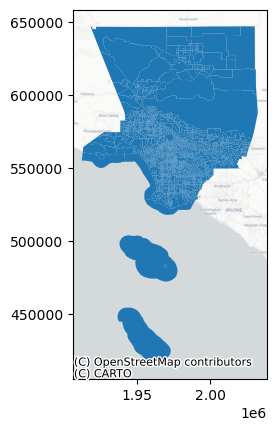

In [132]:
ax =latracts.plot()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='epsg:6423')

In [133]:
columns_to_keep = ['GEOID','geometry']
latracts1 = latracts[columns_to_keep]

In [134]:
latracts1.head()

GEOID                                           geometry
17   06037262601  POLYGON ((1946878.213 564510.409, 1946933.404 ...
62   06037300100  POLYGON ((1977098.970 581980.619, 1977100.309 ...
65   06037300501  POLYGON ((1977079.937 580171.293, 1977079.998 ...
78   06037310701  POLYGON ((1970546.349 576024.829, 1970580.224 ...
211  06037300200  POLYGON ((1977093.113 581363.459, 1977094.149 ...

In [135]:
latracts1['FIPS'] = latracts.GEOID
latracts1

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


GEOID                                           geometry  \
17    06037262601  POLYGON ((1946878.213 564510.409, 1946933.404 ...   
62    06037300100  POLYGON ((1977098.970 581980.619, 1977100.309 ...   
65    06037300501  POLYGON ((1977079.937 580171.293, 1977079.998 ...   
78    06037310701  POLYGON ((1970546.349 576024.829, 1970580.224 ...   
211   06037300200  POLYGON ((1977093.113 581363.459, 1977094.149 ...   
...           ...                                                ...   
9091  06037194500  POLYGON ((1965036.215 564002.474, 1965050.519 ...   
9092  06037195100  POLYGON ((1974447.042 566128.682, 1974456.926 ...   
9093  06037195300  POLYGON ((1973077.500 566791.995, 1973279.026 ...   
9106  06037137501  POLYGON ((1945751.140 574078.955, 1945761.737 ...   
9107  06037702900  POLYGON ((1957181.656 553467.317, 1957235.162 ...   

             FIPS  
17    06037262601  
62    06037300100  
65    06037300501  
78    06037310701  
211   06037300200  
...           ...  
9091  06037194500  
9092  06037195100  
9093  06037195300  
9106  06037137501  
9107  06037702900  

[2498 rows x 3 columns]

## Grocery Store Walkability

In [136]:
food=pd.read_csv('data/finaldata_0303 (1).csv', dtype={'FIPS_census':str})

In [137]:
food.head(3)

geoid20_x    CT20   FIPS_census         tract  ShapeSTArea  ShapeSTLength  \
0    531604  531604  6037531604.0  6.037532e+09  3947756.523    8092.736172   
1    531604  531604  6037531604.0  6.037532e+09  3947756.523    8092.736172   
2    533201  533201  6037533201.0  6.037533e+09  4023505.246    9389.961973   

                                          geometry_x  % Hispanic or Latino  \
0  POLYGON ((-118.15979217068833 34.0256888580665...                    99   
1  POLYGON ((-118.15979217068833 34.0256888580665...                    99   
2  POLYGON ((-118.2126241765933 33.98419884980421...                    99   

   % Not a Citizen  % Unemployed  ...  mental_health_pct  chd_pct  snap_rate  \
0               25             5  ...                 18        5          9   
1               25             5  ...                 18        5          9   
2               32            13  ...                 19        4          7   

            spa  calfresh_per_100_families  Percent 65 years and over  \
0  SPA 7 - East                         35                          9   
1  SPA 7 - East                         35                          9   
2  SPA 7 - East                         27                         12   

   lowaccess_count  denom_total_pop  lowaccess_li_count  \
0                0             3580                   0   
1                0             3580                   0   
2                0             2805                   0   

   lowaccess_seniors_count  
0                        0  
1                        0  
2                        0  

[3 rows x 27 columns]

In [138]:
food.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4910 entries, 0 to 4909
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geoid20_x                          4910 non-null   object 
 1   CT20                               4910 non-null   object 
 2   FIPS_census                        4910 non-null   object 
 3   tract                              4910 non-null   float64
 4   ShapeSTArea                        4910 non-null   float64
 5   ShapeSTLength                      4908 non-null   float64
 6   geometry_x                         4906 non-null   object 
 7   % Hispanic or Latino               4910 non-null   int64  
 8   % Not a Citizen                    4910 non-null   int64  
 9   % Unemployed                       4910 non-null   int64  
 10  Population Density (Per Sq. Mile)  4910 non-null   int64  
 11  Median Household Income            4910 non-null   int64

In [139]:
a= food['lowaccess_count']
b=food['denom_total_pop']
food['lowaccess_pct']=round((a/b)*100)

In [140]:
new = food[food['% Hispanic or Latino'] <= 100]

In [141]:
new['FIPS'] = new.FIPS_census

/tmp/ipykernel_2719/4261393279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['FIPS'] = new.FIPS_census


In [142]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 4909
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geoid20_x                          4908 non-null   object 
 1   CT20                               4908 non-null   object 
 2   FIPS_census                        4908 non-null   object 
 3   tract                              4908 non-null   float64
 4   ShapeSTArea                        4908 non-null   float64
 5   ShapeSTLength                      4906 non-null   float64
 6   geometry_x                         4904 non-null   object 
 7   % Hispanic or Latino               4908 non-null   int64  
 8   % Not a Citizen                    4908 non-null   int64  
 9   % Unemployed                       4908 non-null   int64  
 10  Population Density (Per Sq. Mile)  4908 non-null   int64  
 11  Median Household Income            4908 non-null   int64  
 1

In [143]:
new.head()

geoid20_x    CT20   FIPS_census         tract  ShapeSTArea  ShapeSTLength  \
0    531604  531604  6037531604.0  6.037532e+09  3947756.523    8092.736172   
1    531604  531604  6037531604.0  6.037532e+09  3947756.523    8092.736172   
2    533201  533201  6037533201.0  6.037533e+09  4023505.246    9389.961973   
3    533201  533201  6037533201.0  6.037533e+09  4023505.246    9389.961973   
4    531504  531504  6037531504.0  6.037532e+09  5411952.688   10726.422500   

                                          geometry_x  % Hispanic or Latino  \
0  POLYGON ((-118.15979217068833 34.0256888580665...                    99   
1  POLYGON ((-118.15979217068833 34.0256888580665...                    99   
2  POLYGON ((-118.2126241765933 33.98419884980421...                    99   
3  POLYGON ((-118.2126241765933 33.98419884980421...                    99   
4  POLYGON ((-118.16538417152303 34.0268738575372...                    99   

   % Not a Citizen  % Unemployed  ...  snap_rate           spa  \
0               25             5  ...          9  SPA 7 - East   
1               25             5  ...          9  SPA 7 - East   
2               32            13  ...          7  SPA 7 - East   
3               32            13  ...          7  SPA 7 - East   
4               23             7  ...         12  SPA 7 - East   

   calfresh_per_100_families  Percent 65 years and over  lowaccess_count  \
0                         35                          9                0   
1                         35                          9                0   
2                         27                         12                0   
3                         27                         12                0   
4                         34                          8                0   

   denom_total_pop  lowaccess_li_count  lowaccess_seniors_count  \
0             3580                   0                        0   
1             3580                   0                        0   
2             2805                   0                        0   
3             2805                   0                        0   
4             4414                   0                        0   

   lowaccess_pct          FIPS  
0            0.0  6037531604.0  
1            0.0  6037531604.0  
2            0.0  6037533201.0  
3            0.0  6037533201.0  
4            0.0  6037531504.0  

[5 rows x 29 columns]

In [144]:
new['FIPS'] = new.FIPS.str[-8:]
new.FIPS.head(5)

/tmp/ipykernel_2719/2969218506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['FIPS'] = new.FIPS.str[-8:]


0    531604.0
1    531604.0
2    533201.0
3    533201.0
4    531504.0
Name: FIPS, dtype: object

In [145]:
new['FIPS'] = new.FIPS.str[:6]
new.FIPS.head(5)

/tmp/ipykernel_2719/61147106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['FIPS'] = new.FIPS.str[:6]


0    531604
1    531604
2    533201
3    533201
4    531504
Name: FIPS, dtype: object

In [146]:
latracts1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2498 entries, 17 to 9107
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEOID     2498 non-null   object  
 1   geometry  2498 non-null   geometry
 2   FIPS      2498 non-null   object  
dtypes: geometry(1), object(2)
memory usage: 78.1+ KB


In [147]:
latracts1['FIPS']=latracts1.FIPS.str[-6:]
latracts1.FIPS.head(5)

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


17     262601
62     300100
65     300501
78     310701
211    300200
Name: FIPS, dtype: object

In [148]:
tracts_census= pd.merge(new,latracts1,on='FIPS')

In [149]:
tracts_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   geoid20_x                          4902 non-null   object  
 1   CT20                               4902 non-null   object  
 2   FIPS_census                        4902 non-null   object  
 3   tract                              4902 non-null   float64 
 4   ShapeSTArea                        4902 non-null   float64 
 5   ShapeSTLength                      4902 non-null   float64 
 6   geometry_x                         4900 non-null   object  
 7   % Hispanic or Latino               4902 non-null   int64   
 8   % Not a Citizen                    4902 non-null   int64   
 9   % Unemployed                       4902 non-null   int64   
 10  Population Density (Per Sq. Mile)  4902 non-null   int64   
 11  Median Household Income            4902 non

In [150]:
tracts_census = gpd.GeoDataFrame(tracts_census, geometry='geometry', crs='epsg:6423')

In [151]:
tracts_census.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   geoid20_x                          4902 non-null   object  
 1   CT20                               4902 non-null   object  
 2   FIPS_census                        4902 non-null   object  
 3   tract                              4902 non-null   float64 
 4   ShapeSTArea                        4902 non-null   float64 
 5   ShapeSTLength                      4902 non-null   float64 
 6   geometry_x                         4900 non-null   object  
 7   % Hispanic or Latino               4902 non-null   int64   
 8   % Not a Citizen                    4902 non-null   int64   
 9   % Unemployed                       4902 non-null   int64   
 10  Population Density (Per Sq. Mile)  4902 non-null   int64   
 11  Median Household Income            

## Creating Food Insecurity Index

In [152]:
#telling mapclassify to create categorical variables with 5 options
classifier = mapclassify.NaturalBreaks.make(k=5)

In [153]:
tracts_census['age_pct_score'] = tracts_census[['Percent 65 years and over']].apply(classifier)

tracts_census[['Percent 65 years and over', 'age_pct_score']].head()

Percent 65 years and over  age_pct_score
0                          9              1
1                          9              1
2                         12              2
3                         12              2
4                          8              1

In [154]:
tracts_census['hisp_pct_score'] = tracts_census[['% Hispanic or Latino']].apply(classifier)

tracts_census[['% Hispanic or Latino', 'hisp_pct_score']].head()

% Hispanic or Latino  hisp_pct_score
0                    99               4
1                    99               4
2                    99               4
3                    99               4
4                    99               4

In [155]:
tracts_census['emp_pct_score'] = tracts_census[['% Unemployed']].apply(classifier)

tracts_census[['% Unemployed', 'emp_pct_score']].head()

% Unemployed  emp_pct_score
0             5              1
1             5              1
2            13              3
3            13              3
4             7              2

In [156]:
tracts_census['priority_index'] = tracts_census['age_pct_score']+tracts_census['hisp_pct_score']+tracts_census['emp_pct_score']

In [157]:
tracts_census['priority_index'].head()

0    6
1    6
2    9
3    9
4    7
Name: priority_index, dtype: int64

In [158]:
#FI index
ax = tracts_census.plot(figsize=(12,10),
                   column='priority_index',
                   legend=True,
                   scheme='NaturalBreaks',
                    cmap='Greens')
ax.set_axis_off()
ax.set_title('priority_index')
ctx.add_basemap(ax,crs=6423,
               source=ctx.providers.CartoDB.Positron)
plt.savefig('priority_index.png')

## Creating Subset of Census Tracts

In [159]:
merged_index = tracts_census.sort_values(by='priority_index', ascending=False)

array([[<Axes: title={'center': 'priority_index'}>]], dtype=object)

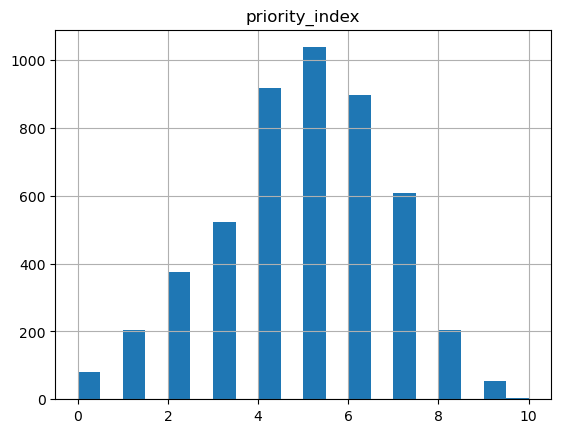

In [160]:
merged_index.hist('priority_index',bins=20)

In [161]:
merged_index = merged_index.head(5)

In [162]:
merged_index = merged_index.to_crs('EPSG:6423')

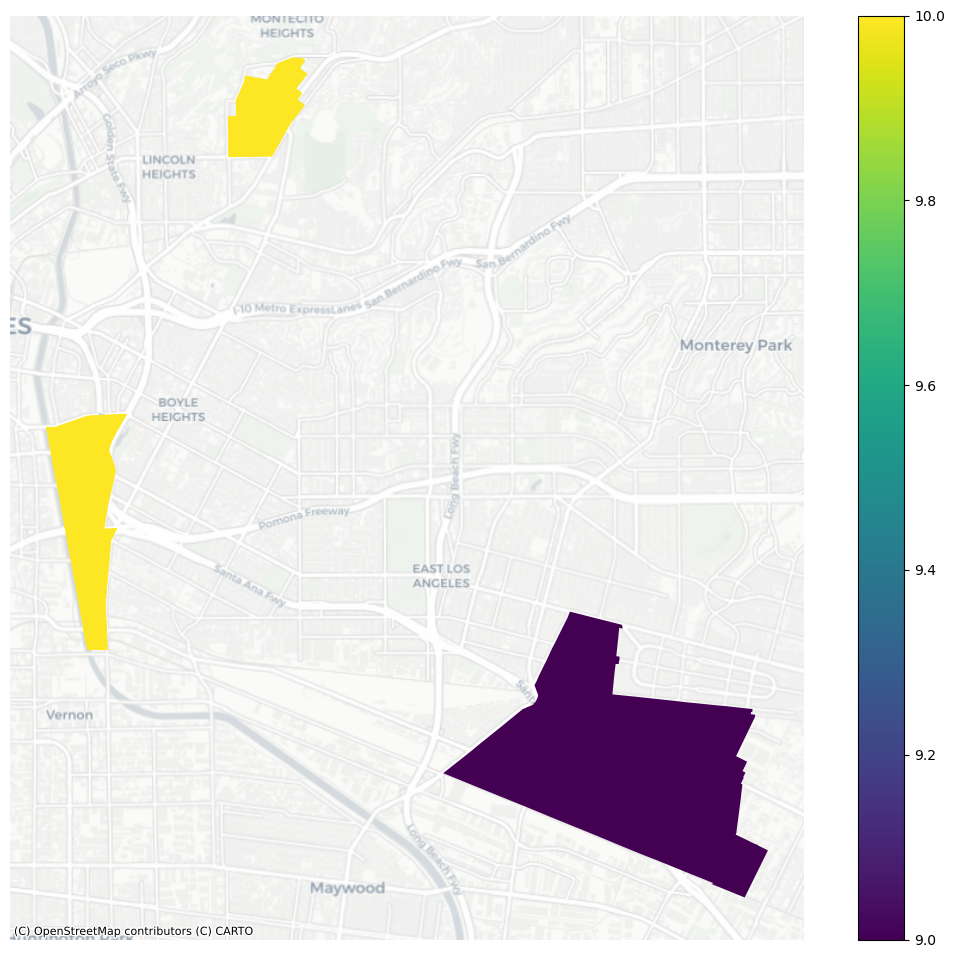

In [163]:
ax = merged_index.plot(column='priority_index',legend=True,figsize=(14,12), missing_kwds={'color':'lightgrey'})
ax.set_axis_off()
ctx.add_basemap(ax,crs=6423,
               source=ctx.providers.CartoDB.Positron)

In [164]:
merged_index.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5 entries, 633 to 276
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   geoid20_x                          5 non-null      object  
 1   CT20                               5 non-null      object  
 2   FIPS_census                        5 non-null      object  
 3   tract                              5 non-null      float64 
 4   ShapeSTArea                        5 non-null      float64 
 5   ShapeSTLength                      5 non-null      float64 
 6   geometry_x                         5 non-null      object  
 7   % Hispanic or Latino               5 non-null      int64   
 8   % Not a Citizen                    5 non-null      int64   
 9   % Unemployed                       5 non-null      int64   
 10  Population Density (Per Sq. Mile)  5 non-null      int64   
 11  Median Household Income            5 non-n

## Need to create a buffer around census tracts, because no grocery stores fall within their borders

In [165]:
# creating a buffer around the high priority census tracts
index_buff = merged_index.buffer(1000)

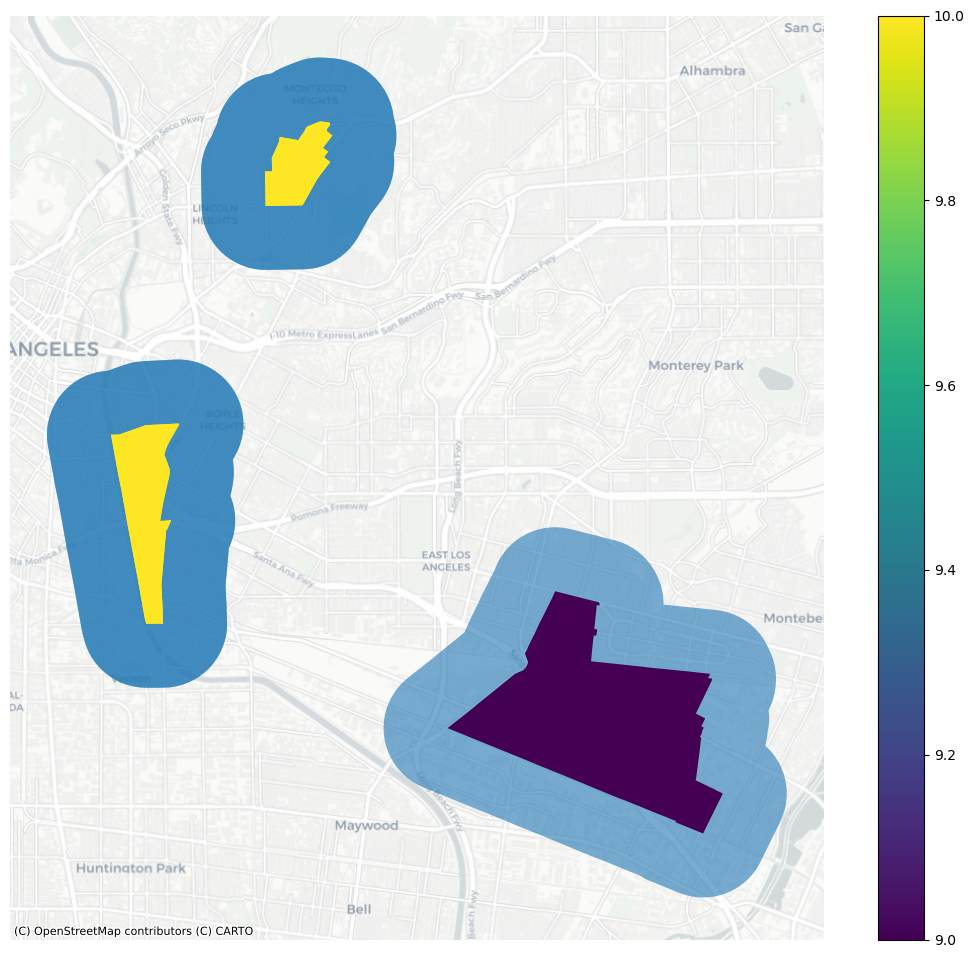

In [166]:
ax = index_buff.plot(figsize=(14,12),alpha=0.6)
ax.set_axis_off()
merged_index.plot(ax=ax,column='priority_index',legend=True,figsize=(14,12), missing_kwds={'color':'lightgrey'})
ctx.add_basemap(ax,crs=6423,
               source=ctx.providers.CartoDB.Positron)

In [174]:
index_buff

633    POLYGON ((1980278.199 564192.804, 1980281.395 ...
632    POLYGON ((1980278.199 564192.804, 1980281.395 ...
626    POLYGON ((1978813.251 561092.945, 1978853.055 ...
627    POLYGON ((1978813.251 561092.945, 1978853.055 ...
276    POLYGON ((1983499.761 556288.612, 1983499.383 ...
dtype: geometry

In [202]:
grocery = gpd.read_file('data/cleanedgrocery.csv')

In [203]:
grocery

field_1 Record ID                       Store Name            Store Type  \
0      63347   1057607                   168 Market 803           Super Store   
1      63348   1171270                   168 Market 806           Supermarket   
2      63349   1192904                   168 Market 805           Super Store   
3      63350   1263449                  168 Market 5801           Super Store   
4      63415   1246643  365 by Whole Foods Market 10658           Super Store   
...      ...       ...                              ...                   ...   
1865   93779   1163074                          Yummy             Supermarket   
1866   93780   1108714                          Yummy             Supermarket   
1867   93816    764764                   Zamora Bros.    Medium Grocery Store   
1868   93855   1287162                         Zeytun    Medium Grocery Store   
1869   93859    426824            ZIGGY'S MEAT MARKET             Supermarket   

     Street Number       Street Name Additional Address              City  \
0              933    E Las Tunas Dr                          San Gabriel   
1            17120         Colima Rd                     Hacienda Heights   
2            19725         Colima Rd                      Rowland Heights   
3             1421     E Valley Blvd                             Alhambra   
4             2520     Glendale Blvd                          Los Angeles   
...            ...               ...                ...               ...   
1865          5520  San Vicente Blvd                          Los Angeles   
1866          3607     W Sunset Blvd                          Los Angeles   
1867          1559       W Pico Blvd                          Los Angeles   
1868          5135     W Sunset Blvd                          Los Angeles   
1869           965      N Maclay Ave                         San Fernando   

     State Zip Code  Zip4       County  Latitude  Longitude  \
0       CA    91776  1640  LOS ANGELES  34.10347  -118.0877   
1       CA    91745  6768  LOS ANGELES  33.99066  -117.9333   
2       CA    91748  3299  LOS ANGELES  33.98619  -117.8717   
3       CA    91801  5239  LOS ANGELES  34.07928  -118.1099   
4       CA    90039  3220  LOS ANGELES  34.10309  -118.2592   
...    ...      ...   ...          ...       ...        ...   
1865    CA    90019  2799  LOS ANGELES  34.05383  -118.3545   
1866    CA    90026  1058  LOS ANGELES   34.0901  -118.2771   
1867    CA    90015  2407  LOS ANGELES  34.04479  -118.2764   
1868    CA    90027  5715  LOS ANGELES  34.09815  -118.3017   
1869    CA    91340  1440  LOS ANGELES  34.29338  -118.4276   

     Authorization Date    End Date end_date open_date                 latlon  \
0            06/01/2012                           2012  [34.10347, -118.0877]   
1            11/20/2014                           2014  [33.99066, -117.9333]   
2            04/09/2015                           2015  [33.98619, -117.8717]   
3            10/24/2016                           2016  [34.07928, -118.1099]   
4            05/11/2016                           2016  [34.10309, -118.2592]   
...                 ...         ...      ...       ...                    ...   
1865         12/01/2014                           2014  [34.05383, -118.3545]   
1866         04/10/2019                           2019   [34.0901, -118.2771]   
1867         04/20/2011  07/01/2022     2022      2011  [34.04479, -118.2764]   
1868         06/21/2017                           2017  [34.09815, -118.3017]   
1869         07/12/1995                           1995  [34.29338, -118.4276]   

     geometry  
0        None  
1        None  
2        None  
3        None  
4        None  
...       ...  
1865     None  
1866     None  
1867     None  
1868     None  
1869     None  

[1870 rows x 20 columns]

In [204]:
grocery = gpd.GeoDataFrame(grocery, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(grocery.Longitude, grocery.Latitude))

In [205]:
grocery.info()
grocery

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   field_1             1870 non-null   object  
 1   Record ID           1870 non-null   object  
 2   Store Name          1870 non-null   object  
 3   Store Type          1870 non-null   object  
 4   Street Number       1870 non-null   object  
 5   Street Name         1870 non-null   object  
 6   Additional Address  1870 non-null   object  
 7   City                1870 non-null   object  
 8   State               1870 non-null   object  
 9   Zip Code            1870 non-null   object  
 10  Zip4                1870 non-null   object  
 11  County              1870 non-null   object  
 12  Latitude            1870 non-null   object  
 13  Longitude           1870 non-null   object  
 14  Authorization Date  1870 non-null   object  
 15  End Date            1870 non-n

field_1 Record ID                       Store Name            Store Type  \
0      63347   1057607                   168 Market 803           Super Store   
1      63348   1171270                   168 Market 806           Supermarket   
2      63349   1192904                   168 Market 805           Super Store   
3      63350   1263449                  168 Market 5801           Super Store   
4      63415   1246643  365 by Whole Foods Market 10658           Super Store   
...      ...       ...                              ...                   ...   
1865   93779   1163074                          Yummy             Supermarket   
1866   93780   1108714                          Yummy             Supermarket   
1867   93816    764764                   Zamora Bros.    Medium Grocery Store   
1868   93855   1287162                         Zeytun    Medium Grocery Store   
1869   93859    426824            ZIGGY'S MEAT MARKET             Supermarket   

     Street Number       Street Name Additional Address              City  \
0              933    E Las Tunas Dr                          San Gabriel   
1            17120         Colima Rd                     Hacienda Heights   
2            19725         Colima Rd                      Rowland Heights   
3             1421     E Valley Blvd                             Alhambra   
4             2520     Glendale Blvd                          Los Angeles   
...            ...               ...                ...               ...   
1865          5520  San Vicente Blvd                          Los Angeles   
1866          3607     W Sunset Blvd                          Los Angeles   
1867          1559       W Pico Blvd                          Los Angeles   
1868          5135     W Sunset Blvd                          Los Angeles   
1869           965      N Maclay Ave                         San Fernando   

     State Zip Code  Zip4       County  Latitude  Longitude  \
0       CA    91776  1640  LOS ANGELES  34.10347  -118.0877   
1       CA    91745  6768  LOS ANGELES  33.99066  -117.9333   
2       CA    91748  3299  LOS ANGELES  33.98619  -117.8717   
3       CA    91801  5239  LOS ANGELES  34.07928  -118.1099   
4       CA    90039  3220  LOS ANGELES  34.10309  -118.2592   
...    ...      ...   ...          ...       ...        ...   
1865    CA    90019  2799  LOS ANGELES  34.05383  -118.3545   
1866    CA    90026  1058  LOS ANGELES   34.0901  -118.2771   
1867    CA    90015  2407  LOS ANGELES  34.04479  -118.2764   
1868    CA    90027  5715  LOS ANGELES  34.09815  -118.3017   
1869    CA    91340  1440  LOS ANGELES  34.29338  -118.4276   

     Authorization Date    End Date end_date open_date                 latlon  \
0            06/01/2012                           2012  [34.10347, -118.0877]   
1            11/20/2014                           2014  [33.99066, -117.9333]   
2            04/09/2015                           2015  [33.98619, -117.8717]   
3            10/24/2016                           2016  [34.07928, -118.1099]   
4            05/11/2016                           2016  [34.10309, -118.2592]   
...                 ...         ...      ...       ...                    ...   
1865         12/01/2014                           2014  [34.05383, -118.3545]   
1866         04/10/2019                           2019   [34.0901, -118.2771]   
1867         04/20/2011  07/01/2022     2022      2011  [34.04479, -118.2764]   
1868         06/21/2017                           2017  [34.09815, -118.3017]   
1869         07/12/1995                           1995  [34.29338, -118.4276]   

                         geometry  
0     POINT (-118.08770 34.10347)  
1     POINT (-117.93330 33.99066)  
2     POINT (-117.87170 33.98619)  
3     POINT (-118.10990 34.07928)  
4     POINT (-118.25920 34.10309)  
...                           ...  
1865  POINT (-118.35450 34.05383)  
1866  POINT (-118.27710 34.09010)  
1867  POINT (-118.27640 34.04479)  
1868  POINT (-118

In [206]:
grocery.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [207]:
grocery = grocery.to_crs('epsg:6423')
grocery

field_1 Record ID                       Store Name            Store Type  \
0      63347   1057607                   168 Market 803           Super Store   
1      63348   1171270                   168 Market 806           Supermarket   
2      63349   1192904                   168 Market 805           Super Store   
3      63350   1263449                  168 Market 5801           Super Store   
4      63415   1246643  365 by Whole Foods Market 10658           Super Store   
...      ...       ...                              ...                   ...   
1865   93779   1163074                          Yummy             Supermarket   
1866   93780   1108714                          Yummy             Supermarket   
1867   93816    764764                   Zamora Bros.    Medium Grocery Store   
1868   93855   1287162                         Zeytun    Medium Grocery Store   
1869   93859    426824            ZIGGY'S MEAT MARKET             Supermarket   

     Street Number       Street Name Additional Address              City  \
0              933    E Las Tunas Dr                          San Gabriel   
1            17120         Colima Rd                     Hacienda Heights   
2            19725         Colima Rd                      Rowland Heights   
3             1421     E Valley Blvd                             Alhambra   
4             2520     Glendale Blvd                          Los Angeles   
...            ...               ...                ...               ...   
1865          5520  San Vicente Blvd                          Los Angeles   
1866          3607     W Sunset Blvd                          Los Angeles   
1867          1559       W Pico Blvd                          Los Angeles   
1868          5135     W Sunset Blvd                          Los Angeles   
1869           965      N Maclay Ave                         San Fernando   

     State Zip Code  Zip4       County  Latitude  Longitude  \
0       CA    91776  1640  LOS ANGELES  34.10347  -118.0877   
1       CA    91745  6768  LOS ANGELES  33.99066  -117.9333   
2       CA    91748  3299  LOS ANGELES  33.98619  -117.8717   
3       CA    91801  5239  LOS ANGELES  34.07928  -118.1099   
4       CA    90039  3220  LOS ANGELES  34.10309  -118.2592   
...    ...      ...   ...          ...       ...        ...   
1865    CA    90019  2799  LOS ANGELES  34.05383  -118.3545   
1866    CA    90026  1058  LOS ANGELES   34.0901  -118.2771   
1867    CA    90015  2407  LOS ANGELES  34.04479  -118.2764   
1868    CA    90027  5715  LOS ANGELES  34.09815  -118.3017   
1869    CA    91340  1440  LOS ANGELES  34.29338  -118.4276   

     Authorization Date    End Date end_date open_date                 latlon  \
0            06/01/2012                           2012  [34.10347, -118.0877]   
1            11/20/2014                           2014  [33.99066, -117.9333]   
2            04/09/2015                           2015  [33.98619, -117.8717]   
3            10/24/2016                           2016  [34.07928, -118.1099]   
4            05/11/2016                           2016  [34.10309, -118.2592]   
...                 ...         ...      ...       ...                    ...   
1865         12/01/2014                           2014  [34.05383, -118.3545]   
1866         04/10/2019                           2019   [34.0901, -118.2771]   
1867         04/20/2011  07/01/2022     2022      2011  [34.04479, -118.2764]   
1868         06/21/2017                           2017  [34.09815, -118.3017]   
1869         07/12/1995                           1995  [34.29338, -118.4276]   

                            geometry  
0     POINT (1991907.809 566943.910)  
1     POINT (2006162.798 554429.209)  
2     POINT (2011855.008 553938.903)  
3     POINT (1989856.454 564262.705)  
4     POINT (1976083.200 566929.066)  
...                              ...  
1865  POINT (1967270.477 561491.889)  
1866  POINT (1974427.570 565492.592)  
1867  POINT (1974478.350 5

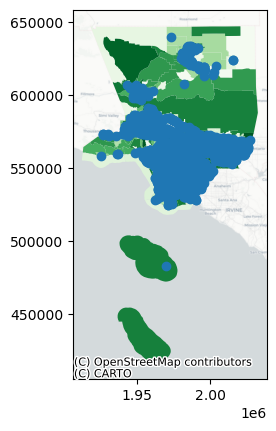

In [208]:
ax = grocery.plot(zorder=5)
latracts.plot(ax=ax,zorder=2,cmap='Greens')
ctx.add_basemap(ax,crs=6423,
               source=ctx.providers.CartoDB.Positron)

In [209]:
grocery_clip = gpd.clip(grocery,index_buff)
grocery_clip = grocery_clip.reset_index()

In [210]:
grocery_clip.info(verbose=True,show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               29 non-null     int64   
 1   field_1             29 non-null     object  
 2   Record ID           29 non-null     object  
 3   Store Name          29 non-null     object  
 4   Store Type          29 non-null     object  
 5   Street Number       29 non-null     object  
 6   Street Name         29 non-null     object  
 7   Additional Address  29 non-null     object  
 8   City                29 non-null     object  
 9   State               29 non-null     object  
 10  Zip Code            29 non-null     object  
 11  Zip4                29 non-null     object  
 12  County              29 non-null     object  
 13  Latitude            29 non-null     object  
 14  Longitude           29 non-null     object  
 15  Authorization Date  29 non-null   

In [211]:
# making grocery store buffers
grocery_buff = grocery_clip.buffer(0.02)

In [212]:
ax = grocery_buff.plot(figsize=(14,12),alpha = 0.5, zorder=6)
ax.set_axis_off()
tracts_census.plot(ax=ax,figsize=(14,12),color='#929591',missing_kwds={'color':'lightgrey'},zorder=2)
merged_index.plot(ax=ax,column='priority_index',legend=True,figsize=(14,12), missing_kwds={'color':'lightgrey'},zorder=8)
grocery_clip.plot(ax=ax,zorder=10)
ctx.add_basemap(ax,crs=6423,
               source=ctx.providers.CartoDB.Positron)

## save geometry for isochrones

In [219]:
grocery_clip = grocery_clip.to_crs('epsg:4326')

In [235]:
# Extract x & y coordinates of projection for calculation within loop.
grocery_clip['Longitude'], grocery_clip['Latitude']=[grocery_clip.geometry.x,grocery_clip.geometry.y]

# Create a geodataframe to store isochrones.
isochrones_all = gpd.GeoDataFrame({'time': [99], 'geometry': [Point(1, 2)]}, crs="EPSG:4326")

# Now, loop through each grocery store to create the isochrones around the grocery store and then append these isochrones to the list.
for index, row in grocery_clip.iterrows():
    # Download the street network surrounding the grocery store.
    G = ox.graph_from_point([grocery_clip.loc[index,'Latitude'],grocery_clip.loc[index,'Longitude']], network_type='walk', dist = 2000)

    # Project this street network data so that measurements are in meters.
    G = ox.project_graph(G, to_crs='epsg:4326')

    # Convert nodes and edges to geodataframes
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

    # Use osmnx's distance.nearest_nodes command to get the id for the nearest node to the grocery store. 
    center_node = ox.distance.nearest_nodes(G,Y=grocery_clip.loc[index,'Latitude'],X=grocery_clip.loc[index,'Longitude'])

    # Create a new column, calculate the time it takes to travel that edge
    gdf_edges['walk_time'] = gdf_edges['length']/80.4672

    # loop through each trip time.
    for time in [15,10,5]:

        # For each trip time, create an egograph of nodes that fall within that time
        subgraph = nx.ego_graph(G, center_node, radius=time)

        # For each of those nodes, update the gdf_nodes dataframe and assign it with its associated time
        for node in subgraph.nodes():
                gdf_nodes.loc[node,'time'] = time

    # Create polygon containing all nodes within each time (first dissolve then create a convex hull).
    isochrones = gdf_nodes.dissolve(by = "time").convex_hull.reset_index(name='geometry')
    
    # Append these results to our growing list of isochrones.
    isochrones_all = pd.concat([isochrones_all,isochrones])

In [236]:
walkbuffers_index=isochrones_all.iloc[1:]

# Dissolve separate walksheds to create single geometry with all areas within each time.
walksheds_index=walkbuffers_index.dissolve(by = "time").reset_index().sort_values(by='time',ascending=False)

In [237]:
#saving walkshed for the top 10 census tracts of the food insecurity index
walksheds_index.to_file('grocery_walksheds_index.geojson')

In [238]:
walksheds_index.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3 entries, 2 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   time      3 non-null      float64 
 1   geometry  3 non-null      geometry
dtypes: float64(1), geometry(1)
memory usage: 72.0 bytes


In [239]:
walksheds_index

time                                           geometry
2  15.0  MULTIPOLYGON (((-118.17395 34.01743, -118.1759...
1  10.0  MULTIPOLYGON (((-118.16599 34.01384, -118.1688...
0   5.0  MULTIPOLYGON (((-118.16454 34.01806, -118.1669...

In [245]:
walksheds_index = walksheds_index.to_crs('epsg:6423')

In [246]:
countyboundary = gpd.read_file('data/County_Boundary.geojson')
countyboundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [247]:
countyboundary = countyboundary.to_crs('epsg:6423')
countyboundary

CITY  CITY_ID       CITY_TYPE       CITY_NAME      CITY_LABEL  COLOR_CODE  \
0   250       31  Unincorporated  Unincorporated  Unincorporated           1   
1   250       31  Unincorporated  Unincorporated  Unincorporated           1   
2   250       31  Unincorporated  Unincorporated  Unincorporated           1   
3   250       31  Unincorporated  Unincorporated  Unincorporated           1   
4   250       31  Unincorporated  Unincorporated  Unincorporated           1   
5   250       31  Unincorporated  Unincorporated  Unincorporated           1   
6   250       31  Unincorporated  Unincorporated  Unincorporated           1   

   ABBR  CITY_NO DESCRIPTN               URL       PHONE  OF_AREA_SM  \
0  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
1  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
2  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
3  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
4  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
5  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
6  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   

  FEAT_TYPE COMMENT  SUB_TYPE COLOR  OBJECTID  \
0      Land                 0     1         1   
1      Land                 0     1         2   
2      Land                 0     1         3   
3      Land                 0     1         4   
4      Land                 0     1         5   
5      Land                 0     1         6   
6      Land                 0     1         7   

                                            geometry  
0  POLYGON ((1961116.718 422001.732, 1961038.606 ...  
1  POLYGON ((1960389.216 422230.488, 1960410.894 ...  
2  POLYGON ((1943766.455 447602.302, 1943758.950 ...  
3  MULTIPOLYGON (((2023899.530 646813.232, 202379...  
4  POLYGON ((1946133.917 447904.173, 1946160.240 ...  
5  POLYGON ((1945849.935 447484.073, 1945833.997 ...  
6  MULTIPOLYGON (((1950199.316 492492.224, 195019...

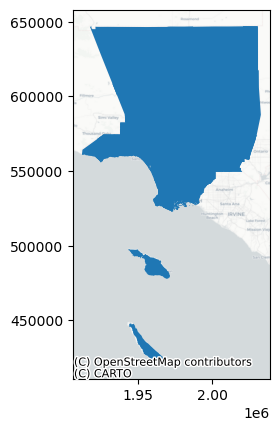

In [243]:
ax = countyboundary.plot()
tracts_census.plot(ax=ax)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='epsg:6423')

In [230]:
tracts_census = gpd.clip(tracts_census, countyboundary)

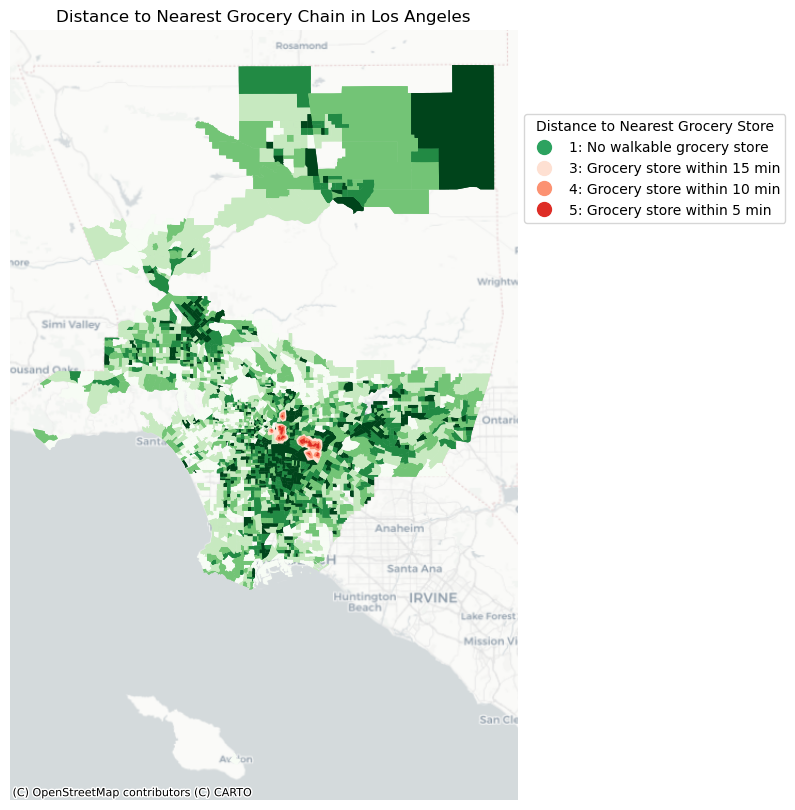

In [252]:
# Walksheds can expand into other municipalities, so we will clip the walkshed to the LA boundary.
walksheds_index_map=gpd.clip(walksheds_index, countyboundary).sort_values(by=['time'],ascending=False)

# I am going to have to create a manual legend since I have multiple layers, so I will first create a color dictionary.
color_dict = {'1: No walkable grocery store': '#2ca25f',
              '3: Grocery store within 15 min': '#fee0d2',
              '4: Grocery store within 10 min': '#fc9272',
              '5: Grocery store within 5 min': '#de2d26'}

# Now I create a "colors" column in each separate dataframe that denotes the color I want things to show up as.
walksheds_index_map.loc[walksheds_index_map['time']==5, 'colors'] = '#de2d26'
walksheds_index_map.loc[walksheds_index_map['time']==10, 'colors'] = '#fc9272'
walksheds_index_map.loc[walksheds_index_map['time']==15, 'colors'] = '#fee0d2'
tracts_census["colors"] = '#2ca25f'

# Now I create my actual map with the three geodataframes added in the appropriate order (zorder).
fig,ax = plt.subplots(figsize=(10,10))
#chain_with_neighborhood.plot(ax=ax, zorder=3,color='orange')
walksheds_index_map.plot(ax=ax, zorder=2, color=walksheds_index_map['colors'])
tracts_census.plot(ax=ax, zorder=1, column='priority_index',cmap='Greens',scheme='natural_breaks')

# Add manual legend.
from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in color_dict.values()]
ax.legend(custom_points, color_dict.keys(), loc='upper left', bbox_to_anchor=(1,.9), title="Distance to Nearest Grocery Store")

#Format plot axis, title, and basemap.
ax.axis('off')
ax.set_title('Distance to Nearest Grocery Chain in Los Angeles')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='epsg:6423')

/opt/conda/lib/python3.11/site-packages/mapclassify/classifiers.py:686: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self._classify()


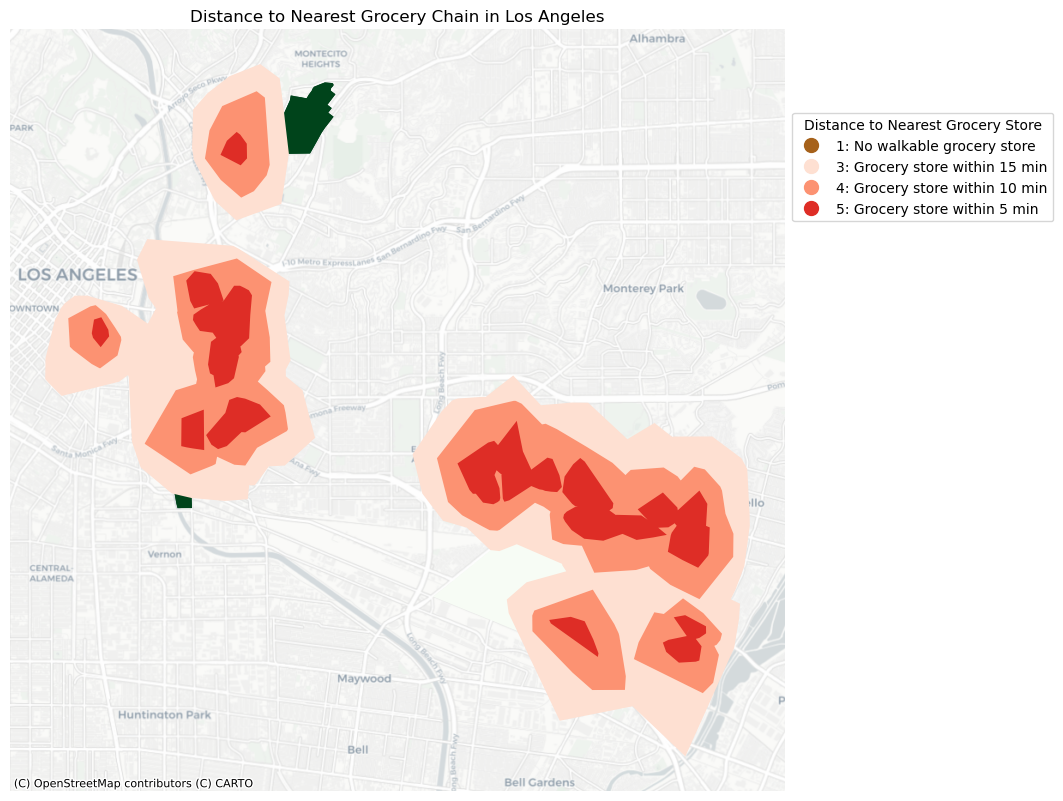

In [254]:
# Walksheds can expand into other municipalities, so we will clip the walkshed to the LA boundary.
walksheds_index_map=gpd.clip(walksheds_index, countyboundary).sort_values(by=['time'],ascending=False)

# I am going to have to create a manual legend since I have multiple layers, so I will first create a color dictionary.
color_dict = {'1: No walkable grocery store': '#a6611a',
              '3: Grocery store within 15 min': '#fee0d2',
              '4: Grocery store within 10 min': '#fc9272',
              '5: Grocery store within 5 min': '#de2d26'}

# Now I create a "colors" column in each separate dataframe that denotes the color I want things to show up as.
walksheds_index_map.loc[walksheds_index_map['time']==5, 'colors'] = '#de2d26'
walksheds_index_map.loc[walksheds_index_map['time']==10, 'colors'] = '#fc9272'
walksheds_index_map.loc[walksheds_index_map['time']==15, 'colors'] = '#fee0d2'
tracts_census["colors"] = '#a6611a'

# Now I create my actual map with the three geodataframes added in the appropriate order (zorder).
fig,ax = plt.subplots(figsize=(10,10))
#chain_with_neighborhood.plot(ax=ax, zorder=3,color='orange')
walksheds_index_map.plot(ax=ax, zorder=2, color=walksheds_index_map['colors'])
merged_index.plot(ax=ax, zorder=1,column='priority_index',cmap='Greens',scheme='natural_breaks')

# Add manual legend.
from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in color_dict.values()]
ax.legend(custom_points, color_dict.keys(), loc='upper left', bbox_to_anchor=(1,.9), title="Distance to Nearest Grocery Store")

#Format plot axis, title, and basemap.
ax.axis('off')
ax.set_title('Distance to Nearest Grocery Chain in Los Angeles')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='epsg:6423')

In [255]:
# Walksheds can expand into other municipalities, so we will clip the walkshed to the LA boundary.
walksheds_index_map=gpd.clip(walksheds_index, merged_index).sort_values(by=['time'],ascending=False)

# I am going to have to create a manual legend since I have multiple layers, so I will first create a color dictionary.
color_dict = {'1: No walkable grocery store': '#a6611a',
              '3: Grocery store within 15 min': '#80cdc1',
              '4: Grocery store within 10 min': '#35978f',
              '5: Grocery store within 5 min': '#01665e'}

# Now I create a "colors" column in each separate dataframe that denotes the color I want things to show up as.
walksheds_index_map.loc[walksheds_index_map['time']==5, 'colors'] = '#01665e'
walksheds_index_map.loc[walksheds_index_map['time']==10, 'colors'] = '#35978f'
walksheds_index_map.loc[walksheds_index_map['time']==15, 'colors'] = '#80cdc1'
tracts_census["colors"] = '#a6611a'

# Now I create my actual map with the three geodataframes added in the appropriate order (zorder).
fig,ax = plt.subplots(figsize=(10,10))
#chain_with_neighborhood.plot(ax=ax, zorder=3,color='orange')
walksheds_index_map.plot(ax=ax, zorder=2, color=walksheds_index_map['colors'])
merged_index.plot(ax=ax, zorder=1, column='priority_index', cmap='Reds', scheme='natural_breaks')

# Add manual legend.
from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in color_dict.values()]
ax.legend(custom_points, color_dict.keys(), loc='upper left', bbox_to_anchor=(1,.9), title="Distance to Nearest Grocery Store")

#Format plot axis, title, and basemap.
ax.axis('off')
ax.set_title('Distance to Nearest Grocery Chain in Los Angeles for Top 5 Census Tracts')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='epsg:6423')

/opt/conda/lib/python3.11/site-packages/mapclassify/classifiers.py:686: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self._classify()


## Plotting Entire LA City's Grocery Stores

In [265]:
resources = gpd.read_file('data/Food_Assistance (1).geojson',crs='epsg:4326')

In [266]:
resources_clip = gpd.clip(grocery,index_buff)
resources_clip = resources_clip.reset_index()

In [267]:
resources_clip.shape

(29, 21)

In [270]:
resources_clip = resources_clip.to_crs('epsg:4326')
resources_clip

index field_1 Record ID  \
0     790   81279   1159296   
1     744   80245   1039670   
2     239   69572    674976   
3     295   70839    923730   
4     877   83514   1274466   
5    1643   92046   1317742   
6     210   69179   1272764   
7     880   83565   1351560   
8     389   73339    289355   
9     930   83746   1341219   
10   1261   88943    707367   
11    743   80243    409070   
12   1350   89422   1361624   
13   1014   85193    378569   
14    211   69184   1356666   
15   1820   93292   1326510   
16    395   73449    386187   
17   1531   90819    899498   
18    377   73190   1251368   
19    789   81252   1207398   
20    964   84368   1074915   
21   1293   89206    555501   
22    864   83423   1198456   
23   1572   91517    788159   
24    973   84420   1384511   
25    247   69637   1286844   
26     30   65846   1342612   
27    172   68446    387907   
28    786   81106   1206598   

                                           Store Name            Store Type  \
0                         Little Tokyo Market Place             Super Store   
1                            La Poblana Meat Market     Large Grocery Store   
2                               Carniceria Monarca #2  Medium Grocery Store   
3                               Costco Wholesale 0569           Super Store   
4                                           Monarca 1   Small Grocery Store   
5                                       Vail Market    Medium Grocery Store   
6                             Calimax Liquor Market     Small Grocery Store   
7                        Montebello Food Supply Inc     Large Grocery Store   
8                            EL REGALO DE MICHOACAN     Large Grocery Store   
9                     Mother's Nutritional Center 437           Supermarket   
10                            SHIRAK GROCERY & DELI     Small Grocery Store   
11                            La Poblana Carniceria    Medium Grocery Store   
12                             Sotos Kids Nutrition     Small Grocery Store   
13                    PALOMINO MEAT MARKET & BAKERY    Medium Grocery Store   
14                                   Calimex Market     Large Grocery Store   
15                               Whittier Nutrition     Small Grocery Store   
16                                         El Super 3           Supermarket   
17                                Target Store T-0189           Super Store   
18                          El Progreso Meat Market     Small Grocery Store   
19                            Little Farmers Market    Medium Grocery Store   
20                                Northgate Market 37           Super Store   
21                                  SMART & FINAL 345           Super Store   
22                                            MNC 237           Supermarket   
23                           TORTILLERIA SAN MARCOS     Small Grocery Store   
24                              Nueva Corona Market    Medium Grocery Store   
25                 Carnitas Uruapan Market & Bakery    Medium Grocery Store   
26  Adventist Health White Memorial Farmers' Market         Farmers' Market   
27                                   Big Saver Food 1           Super Store   
28         Lincoln Heights Certified Farmers Market         Farmers' Market   

   Street Number           Street Name Additional Address             City  \
0            333          S Alameda St            Ste 100      Los Angeles   
1           5111        E Olympic Blvd                         Los Angeles   
2           1200       S Greenwood Ave                          Montebello   
3           6333          Telegraph Rd                            Commerce   
4           1111       Whashington Blv        Suite J & K       Montebello   
5           1701        W Olympic Blvd                          Montebello   
6           6600        E Olympic Blvd            Ste 101      Los Angeles   
7           1801       W Whittier Blvd                          Montebello   


In [301]:
# Extract x & y coordinates of projection for calculation within loop.
resources_clip['Longitude'], resources_clip['Latitude']=[resources_clip.geometry.x,resources_clip.geometry.y]

# Create a geodataframe to store isochrones.
isochrones_noclip_all = gpd.GeoDataFrame({'time': [99], 'geometry': [Point(1, 2)]}, crs="epsg:4326").copy()

# Now, loop through each grocery store to create the isochrones around the grocery store and then append these isochrones to the list.
for index, row in resources_clip.iterrows():
    # Download the street network surrounding the grocery store.
    G = ox.graph_from_point([resources_clip.loc[index,'Latitude'],resources_clip.loc[index,'Longitude']], network_type='walk', dist = 2000)

    # Project this street network data so that measurements are in meters.
    G = ox.project_graph(G, to_crs='epsg:4326')
    
    # Convert nodes and edges to geodataframes
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
    
    # Use osmnx's distance.nearest_nodes command to get the id for the nearest node to the grocery store. 
    center_node = ox.distance.nearest_nodes(G,Y=resources_clip.loc[0,'Latitude'],X=resources_clip.loc[0,'Longitude'])
    
    # Create a new column, calculate the time it takes to travel that edge
    gdf_edges['walk_time'] = gdf_edges['length']/80.4672
    
    # loop through each trip time.
    for time in [15,10,5]:
    
    # For each trip time, create an egograph of nodes that fall within that time
        subgraph = nx.ego_graph(G, center_node, radius=time)
    
    # For each of those nodes, update the gdf_nodes dataframe and assign it with its associated time
        for node in subgraph.nodes():
                gdf_nodes.loc[node,'time'] = time
    
    # Create polygon containing all nodes within each time (first dissolve then create a convex hull).
        isochrones_noclip = gdf_nodes.dissolve(by = "time")
        isochrones_noclip = isochrones_noclip.convex_hull.reset_index(name='geometry')

    # Append these results to our growing list of isochrones.
    isochrones_noclip_all = pd.concat([isochrones_noclip_all,isochrones_noclip])

In [302]:
walkbuffers_resources=isochrones_noclip_all.iloc[1:]

# Dissolve separate walksheds to create single geometry with all areas within each time.
walksheds_resources=walkbuffers_resources.dissolve(by = "time").reset_index().sort_values(by='time',ascending=False)

In [303]:
#saving walkshed for the top 10 census tracts of the food insecurity index
walksheds_resources.to_file('resources_walksheds.geojson')

In [304]:
walksheds_resources

time                                           geometry
2  15.0  MULTIPOLYGON (((-118.18192 34.02112, -118.1798...
1  10.0  MULTIPOLYGON (((-118.17679 34.03917, -118.1761...
0   5.0  MULTIPOLYGON (((-118.17790 34.03851, -118.1798...

In [313]:
countyboundary = countyboundary.to_crs('epsg:6423')
countyboundary

CITY  CITY_ID       CITY_TYPE       CITY_NAME      CITY_LABEL  COLOR_CODE  \
0   250       31  Unincorporated  Unincorporated  Unincorporated           1   
1   250       31  Unincorporated  Unincorporated  Unincorporated           1   
2   250       31  Unincorporated  Unincorporated  Unincorporated           1   
3   250       31  Unincorporated  Unincorporated  Unincorporated           1   
4   250       31  Unincorporated  Unincorporated  Unincorporated           1   
5   250       31  Unincorporated  Unincorporated  Unincorporated           1   
6   250       31  Unincorporated  Unincorporated  Unincorporated           1   

   ABBR  CITY_NO DESCRIPTN               URL       PHONE  OF_AREA_SM  \
0  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
1  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
2  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
3  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
4  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
5  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   
6  UNIN        0     UNINC  www.lacounty.gov  2139744321           0   

  FEAT_TYPE COMMENT  SUB_TYPE COLOR  OBJECTID  \
0      Land                 0     1         1   
1      Land                 0     1         2   
2      Land                 0     1         3   
3      Land                 0     1         4   
4      Land                 0     1         5   
5      Land                 0     1         6   
6      Land                 0     1         7   

                                            geometry  
0  POLYGON ((1961116.718 422001.732, 1961038.606 ...  
1  POLYGON ((1960389.216 422230.488, 1960410.894 ...  
2  POLYGON ((1943766.455 447602.302, 1943758.950 ...  
3  MULTIPOLYGON (((2023899.530 646813.232, 202379...  
4  POLYGON ((1946133.917 447904.173, 1946160.240 ...  
5  POLYGON ((1945849.935 447484.073, 1945833.997 ...  
6  MULTIPOLYGON (((1950199.316 492492.224, 195019...

In [312]:
walksheds_resources = walksheds_resources.to_crs('epsg:6423')
walksheds_resources

time                                           geometry
2  15.0  MULTIPOLYGON (((1983197.891 557820.855, 198339...
1  10.0  MULTIPOLYGON (((1983675.191 559822.924, 198373...
0   5.0  MULTIPOLYGON (((1983572.028 559749.606, 198339...

In [315]:
walksheds_resources_map=gpd.clip(walksheds_resources, countyboundary).sort_values(by=['time'],ascending=False)
walksheds_resources_map

time                                           geometry
2  15.0  MULTIPOLYGON (((1983390.903 558405.794, 198345...
1  10.0  MULTIPOLYGON (((1983730.334 560093.155, 198374...
0   5.0  MULTIPOLYGON (((1983392.015 559471.287, 198326...

In [316]:
ax=walksheds_resources_map.plot()

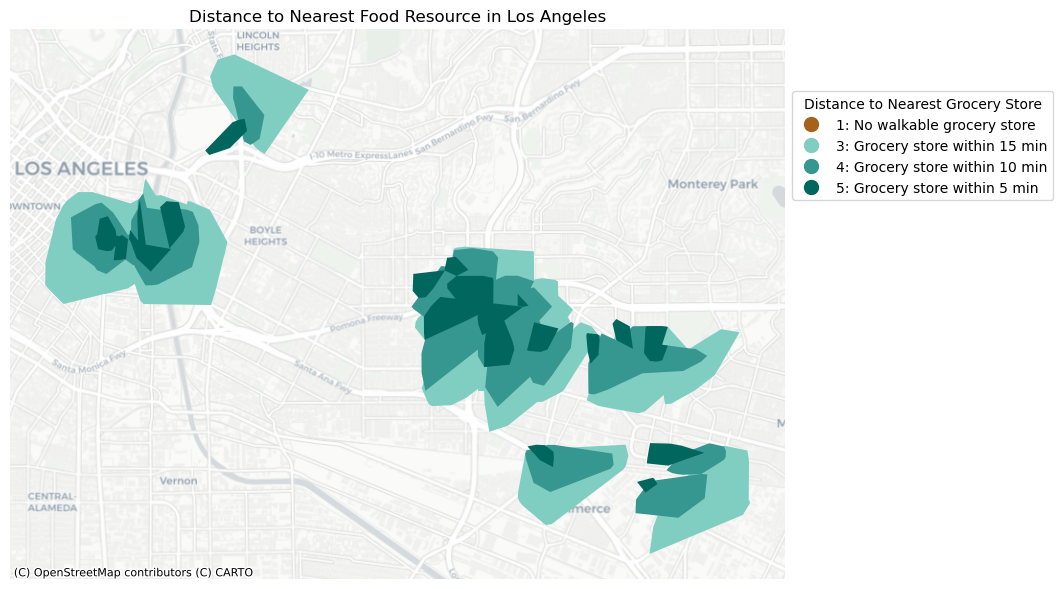

In [314]:
# Walksheds can expand into other municipalities, so we will clip the walkshed to the LA boundary.
walksheds_resources_map=gpd.clip(walksheds_resources, countyboundary).sort_values(by=['time'],ascending=False)

# I am going to have to create a manual legend since I have multiple layers, so I will first create a color dictionary.
color_dict = {'1: No walkable grocery store': '#a6611a',
              '3: Grocery store within 15 min': '#80cdc1',
              '4: Grocery store within 10 min': '#35978f',
              '5: Grocery store within 5 min': '#01665e'}

# Now I create a "colors" column in each separate dataframe that denotes the color I want things to show up as.
walksheds_resources_map.loc[walksheds_resources_map['time']==5, 'colors'] = '#01665e'
walksheds_resources_map.loc[walksheds_resources_map['time']==10, 'colors'] = '#35978f'
walksheds_resources_map.loc[walksheds_resources_map['time']==15, 'colors'] = '#80cdc1'
tracts_census["colors"] = '#a6611a'

# Now I create my actual map with the three geodataframes added in the appropriate order (zorder).
fig,ax = plt.subplots(figsize=(10,10))
#chain_with_neighborhood.plot(ax=ax, zorder=3,color='orange')
walksheds_resources_map.plot(ax=ax, zorder=2, color=walksheds_resources_map['colors'])
#merged_index.plot(ax=ax, zorder=1, color=tracts_census['colors'])

# Add manual legend.
from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in color_dict.values()]
ax.legend(custom_points, color_dict.keys(), loc='upper left', bbox_to_anchor=(1,.9), title="Distance to Nearest Grocery Store")

#Format plot axis, title, and basemap.
ax.axis('off')
ax.set_title('Distance to Nearest Food Resource in Los Angeles')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='epsg:6423')